In [56]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [57]:
df=pd.read_csv("Student_Marks.csv")

In [58]:
df.head(10)


,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
5,6,3.211,17.822
6,3,6.063,29.889
7,5,3.413,17.264
8,4,4.410,20.348
9,3,6.173,30.862


In [59]:
df.shape

(100, 3)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [61]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [62]:
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

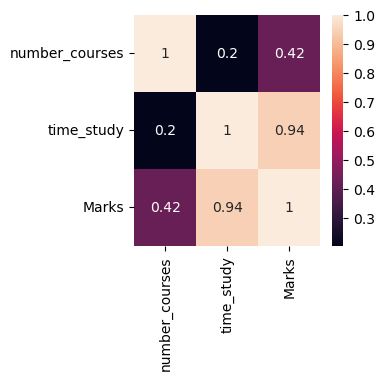

In [63]:
ax = plt.subplots(figsize = (3,3))
sns.heatmap(df.corr(),annot = True);

In [64]:
x=df[["number_courses", "time_study"]]
y=df[["Marks"]]

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [66]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80, 2), (20, 2), (80, 1), (20, 1))

In [67]:
lr = LinearRegression()
regmodel = lr.fit(x_train,y_train)

In [68]:
y_pretest = regmodel.predict(x_test) # test verisinde araba fiyatlarini tahmin ettik


In [69]:
(mean_squared_error(y_test,y_pretest))**0.5 #karekökünü aldık **0.5 ile

3.7683850833446644

In [70]:
r2_score(y_test,y_pretest)

0.9459936100591213

In [71]:
from sklearn.linear_model import Ridge,Lasso

In [72]:
R = Ridge()
R.fit(x_train,y_train)
y_pred_ridge = R.predict(x_test)

In [73]:
(mean_squared_error(y_test,y_pred_ridge))**0.5 #karekökünü aldık **0.5 ile

3.788572256743269

In [74]:
r2_score(y_test,y_pred_ridge)

0.9454134376389445

In [75]:
L = Lasso()
L.fit(x_train,y_train)
y_pred_lasso = L.predict(x_test)
y_pred_lasso

array([19.45240472, 36.9335069 , 20.57267598, 10.58258557, 11.63018976,
       44.01041742, 13.70151291, 46.50829013, 37.13905982, 22.86219489,
       43.68925068, 27.55322872,  8.41471013, 38.08388754, 27.56447111,
       47.36018334, 35.42041323, 38.19689498, 27.74512739,  9.89006981])

In [76]:
(mean_squared_error(y_test,y_pred_lasso))**0.5 #karekökünü aldık **0.5 ile

4.152084912819581

In [77]:
r2_score(y_test,y_pred_lasso)

0.9344357573636715

In [78]:
from sklearn.linear_model import ElasticNet #Lasso ile Ridge'i kullanır. Hangisinin iyi yönleri varsa onları kullanır

In [79]:
E = ElasticNet(l1_ratio = .8)

In [80]:
E.fit(x_train,y_train)
y_pred_elastic = E.predict(x_test)

In [81]:
(mean_squared_error(y_test,y_pred_elastic))**0.5

4.427609652316029

In [82]:
r2_score(y_test,y_pred_elastic)

0.925445605591719

In [83]:
# ExtraTreeRegressor
ETR = ExtraTreeRegressor()
ETR.fit(x_train,y_train)
y_pred_etr = ETR.predict(x_test)

In [84]:
(mean_squared_error(y_test,y_pred_etr))**0.5

1.6862721162374714

In [85]:
r2_score(y_test,y_pred_etr)

0.989185911656253

In [86]:
#GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [87]:
y_pred_gbr = GBR.predict(x_test)

In [88]:
(mean_squared_error(y_test,y_pred_gbr))**0.5

1.0930778486741255

In [89]:
r2_score(y_test,y_pred_gbr)

0.995456016114922

In [90]:
#K- Neighbors  #konuma göre komsularin ev fiyatlarına bakarak fiyat tahmin ediyor
from sklearn.neighbors import KNeighborsRegressor
est = KNeighborsRegressor(n_neighbors = 10,weights = 'uniform')
model = est.fit(x_train,y_train)

In [91]:
y_pred_knb = model.predict(x_test)

In [92]:
y_pred_knb.shape

(20, 1)

In [93]:
(mean_squared_error(y_test,y_pred_knb))**0.5

3.627994124581791

In [94]:
r2_score(y_test,y_pred_knb)

0.9499426625350972

In [95]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

In [96]:
y_pred_xgb = model.predict(x_test)

In [97]:
(mean_squared_error(y_test,y_pred_xgb))**0.5


2.3567958503576683

In [98]:
r2_score(y_test,y_pred_xgb)

0.9788758848882152

In [99]:
def algo_test(x,y):

    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()

    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)

    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []

    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)

    for algo in algos:
        algo.fit(x_train,y_train)

        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae

    return result.sort_values('R_Squared', ascending=False)

In [100]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.995138,0.954050,0.666668
XGradientBooting,0.989080,1.429777,1.027145
Linear,0.961061,2.699884,2.247706
Ridge,0.960902,2.705388,2.255643
Lasso,0.959017,2.769839,2.342256
ElasticNet,0.946639,3.160564,2.652423
Extra Tree,0.945006,3.208546,2.352950
